In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_data = pd.read_csv('D:/桌面/python机器学习/决策树/Train_set.txt')
validation_data = pd.read_csv('D:/桌面/python机器学习/决策树/Validation_set.txt')
full_data = pd.read_csv('D:/桌面/python机器学习/决策树/西瓜.txt')

# print(full_data.head())

train_data = train_data.drop(columns=['编号'])
validation_data = validation_data.drop(columns=['编号'])
full_data = full_data.drop(columns=['编号'])

# 使用DecisionTreeClassifier要求使用数值型数据
# 将分类特征转换为数值特征
X_train = pd.get_dummies(train_data.iloc[:, :-1])
y_train = train_data.iloc[:, -1]
X_val = pd.get_dummies(validation_data.iloc[:, :-1])
y_val = validation_data.iloc[:, -1]
X_full = pd.get_dummies(full_data.iloc[:, :-1])
y_full = full_data.iloc[:, -1]

X_train, X_val = X_train.align(X_val, join='outer', axis=1, fill_value=0)
X_full, _ = X_full.align(X_val, join='outer', axis=1, fill_value=0)

未剪枝决策树 - 训练集精度: 1.0
未剪枝决策树 - 验证集精度: 0.42857142857142855


D:\anaconda\Lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 33040 (\N{CJK UNIFIED IDEOGRAPH-8110}) missing from current font.
  ann.update_bbox_position_size(renderer)
D:\anaconda\Lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from current font.
  ann.update_bbox_position_size(renderer)
D:\anaconda\Lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  ann.update_bbox_position_size(renderer)
D:\anaconda\Lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 22374 (\N{CJK UNIFIED IDEOGRAPH-5766}) missing from current font.
  ann.update_bbox_position_size(renderer)
D:\anaconda\Lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 21542 (\N{CJK UNIFIED IDEOGRAPH-5426}) missing from current font.
  ann.update_bbox_position_size(renderer)
D:\anaconda\Lib\site-packages\sklearn\tree\_export.py:676: UserWarning

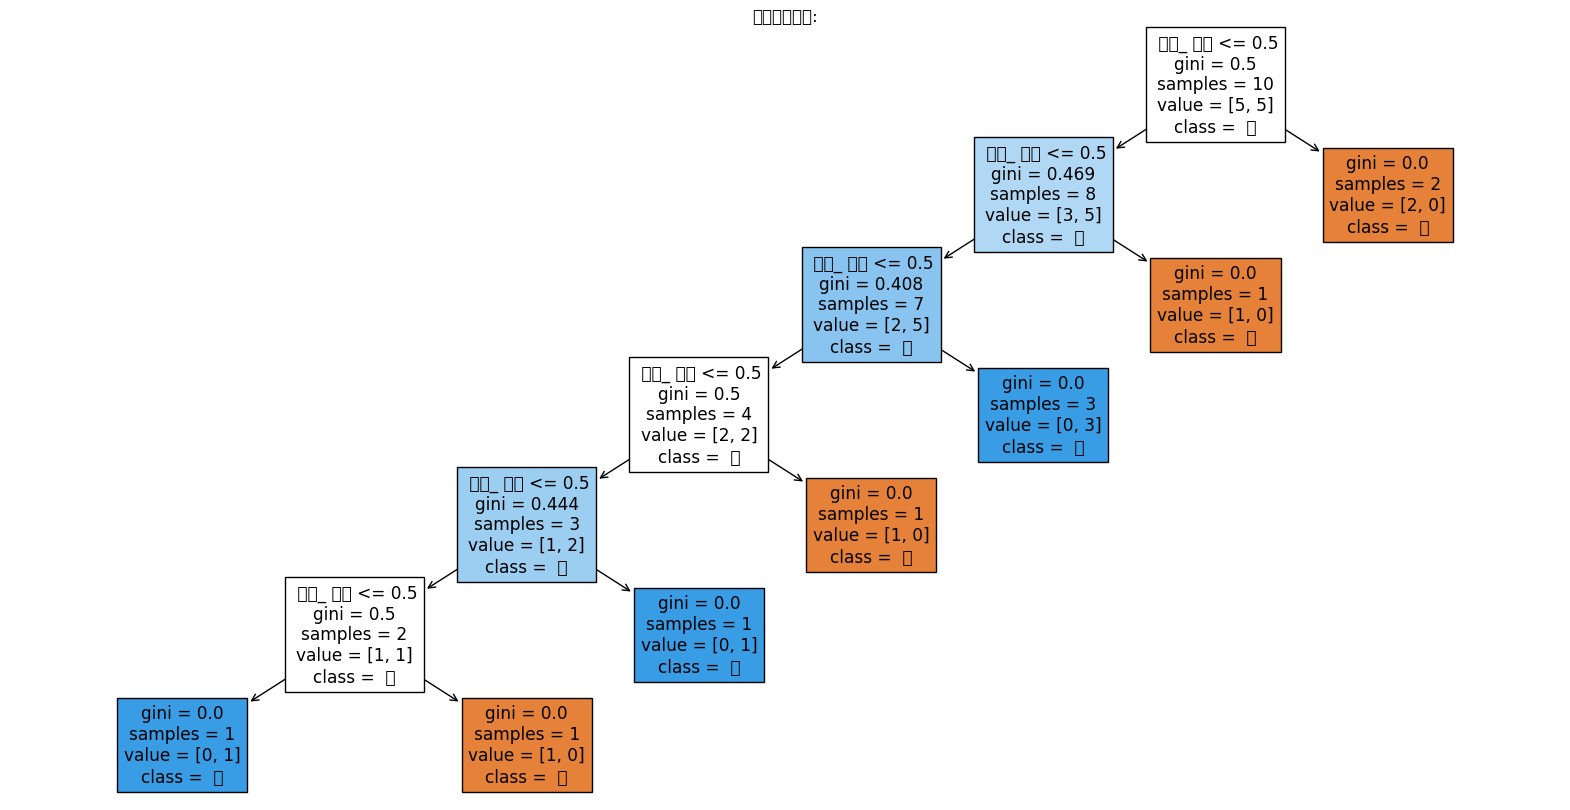

In [2]:
# 生成未剪枝的决策树
non_tree = DecisionTreeClassifier(criterion='gini')
non_tree.fit(X_train, y_train)
y_train_predict1=non_tree.predict(X_train)
y_val_predict1=non_tree.predict(X_val)

print(f"未剪枝决策树 - 训练集精度: {accuracy_score(y_train, y_train_predict1)}")
print(f"未剪枝决策树 - 验证集精度: {accuracy_score(y_val, y_val_predict1)}")

plt.figure(figsize=(20,10))
plot_tree(non_tree,filled=True,feature_names=X_train.columns,class_names=np.unique(y_train).astype(str))
plt.title('未剪枝决策树:')
plt.show()



预剪枝决策树 - 训练集精度: 0.7
预剪枝决策树 - 验证集精度: 0.5714285714285714


D:\anaconda\Lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}) missing from current font.
  ann.update_bbox_position_size(renderer)
D:\anaconda\Lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 27901 (\N{CJK UNIFIED IDEOGRAPH-6CFD}) missing from current font.
  ann.update_bbox_position_size(renderer)
D:\anaconda\Lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 27973 (\N{CJK UNIFIED IDEOGRAPH-6D45}) missing from current font.
  ann.update_bbox_position_size(renderer)
D:\anaconda\Lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 30333 (\N{CJK UNIFIED IDEOGRAPH-767D}) missing from current font.
  ann.update_bbox_position_size(renderer)
D:\anaconda\Lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 21542 (\N{CJK UNIFIED IDEOGRAPH-5426}) missing from current font.
  ann.update_bbox_position_size(renderer)
D:\anaconda\Lib\site-packages\sklearn\tree\_export.py:676: UserWarning

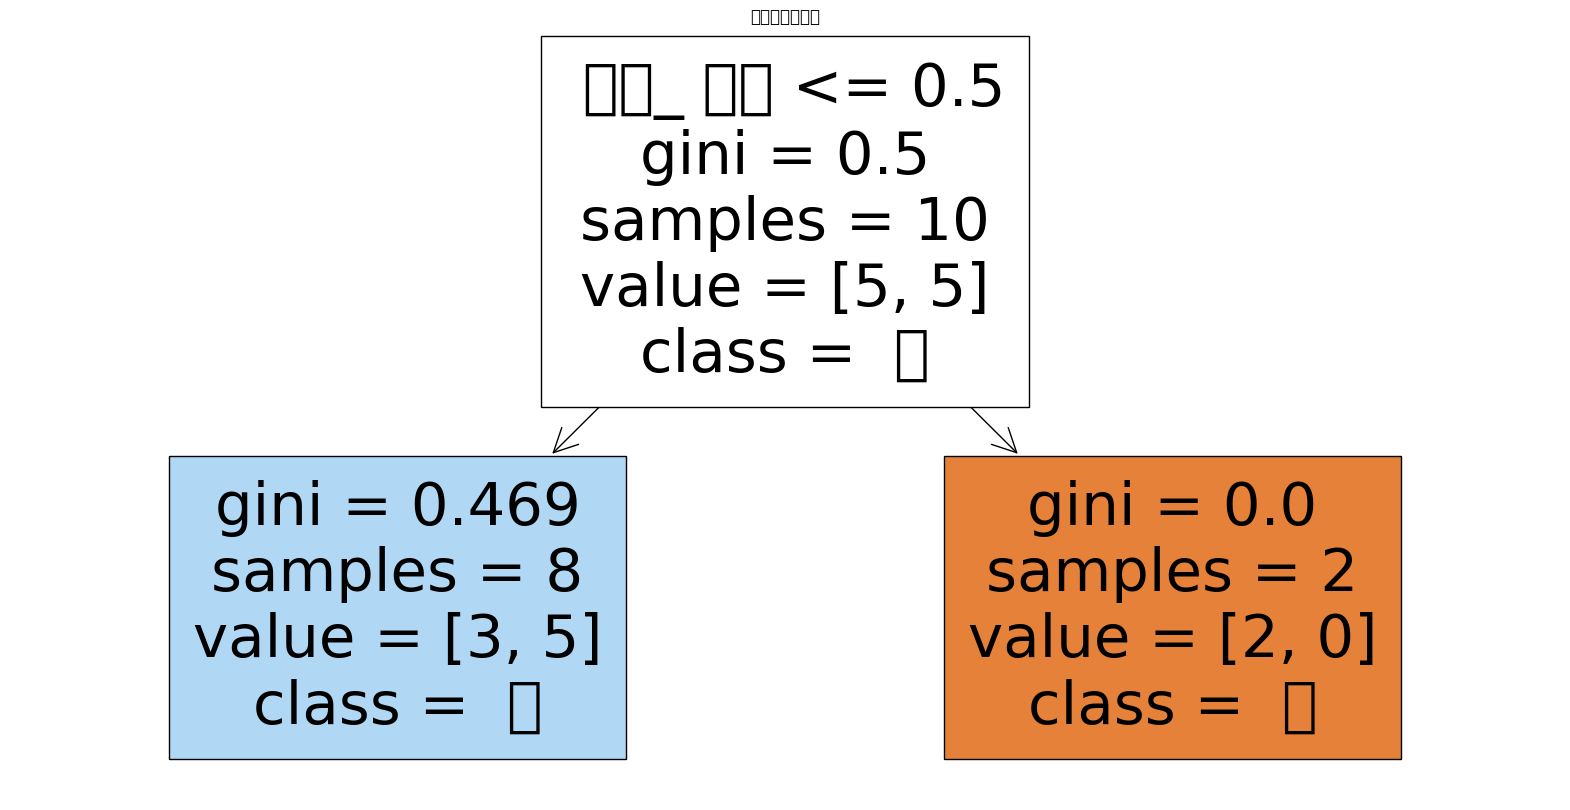

In [3]:
# 生成预剪枝决策树
pre_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10)
pre_tree.fit(X_train, y_train)

y_train_predict2 = pre_tree.predict(X_train)
y_val_predict2 = pre_tree.predict(X_val)

print(f"预剪枝决策树 - 训练集精度: {accuracy_score(y_train, y_train_predict2)}")
print(f"预剪枝决策树 - 验证集精度: {accuracy_score(y_val, y_val_predict2)}")

plt.figure(figsize=(20,10))
plot_tree(pre_tree, filled=True, feature_names=X_train.columns, class_names=np.unique(y_train).astype(str))
plt.title("预剪枝决策树：")
plt.show()


后剪枝决策树 - 训练集精度: 0.5
后剪枝决策树 - 验证集精度: 0.5714285714285714


D:\anaconda\Lib\site-packages\sklearn\tree\_export.py:676: UserWarning: Glyph 21542 (\N{CJK UNIFIED IDEOGRAPH-5426}) missing from current font.
  ann.update_bbox_position_size(renderer)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21518 (\N{CJK UNIFIED IDEOGRAPH-540E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21098 (\N{CJK UNIFIED IDEOGRAPH-526A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26525 (\N{CJK UNIFIED IDEOGRAPH-679D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20915 (\N{CJK UNIFIED IDEOGRAPH-51B3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:1

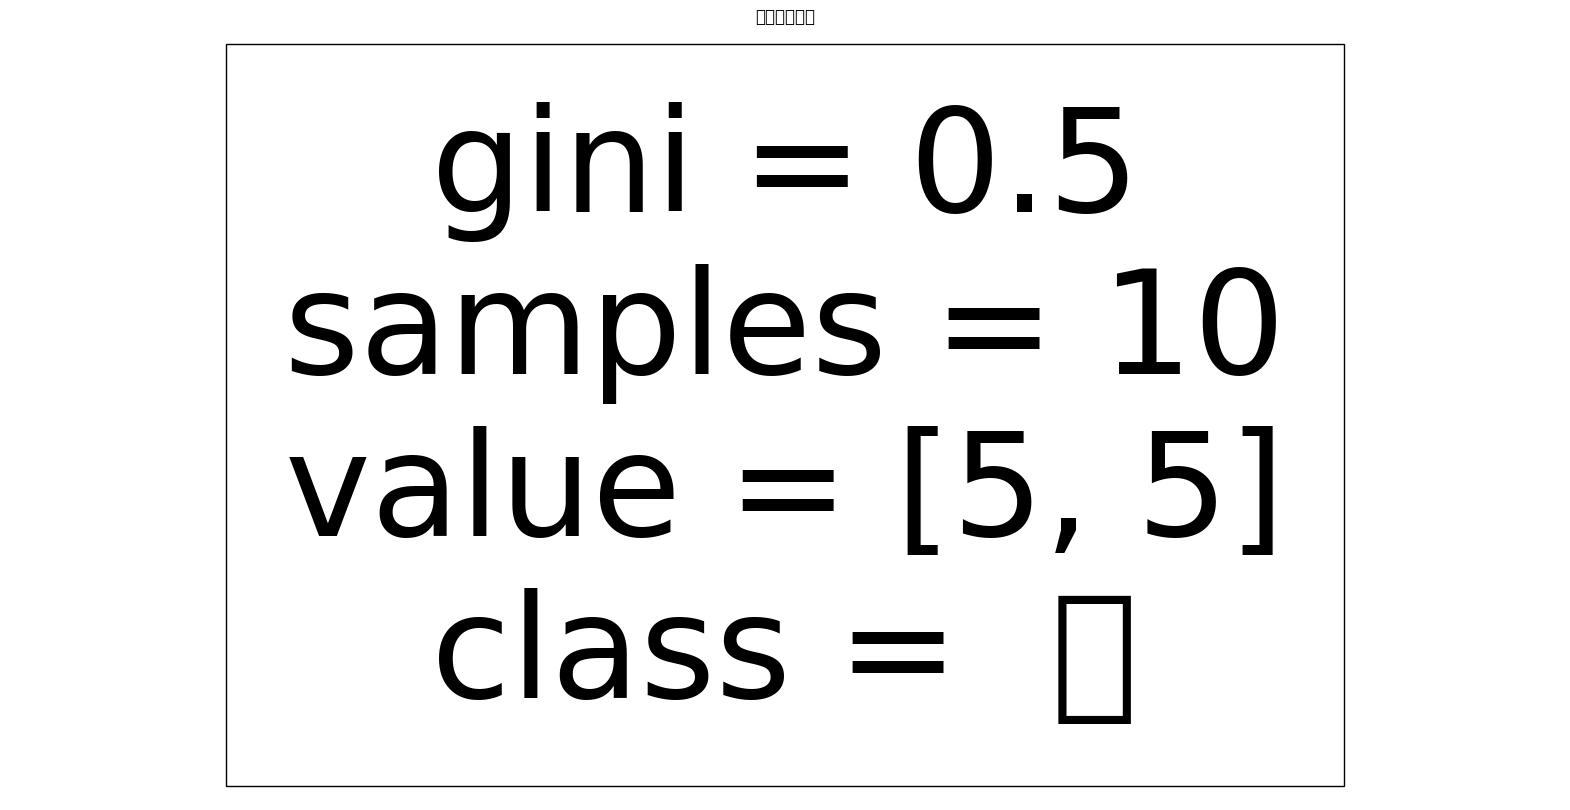

In [4]:
def post(tree, X_val, y_val):
    path = tree.cost_complexity_pruning_path(X_val, y_val)
    ccp_alphas = path.ccp_alphas

    trees = []
    for ccp_alpha in ccp_alphas:
        tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        tree.fit(X_train, y_train)
        trees.append(tree)
    
    val_scores = [accuracy_score(y_val, tree.predict(X_val)) for tree in trees]
    best_tree_index = val_scores.index(max(val_scores))
    
    return trees[best_tree_index]

post_tree = post(non_tree, X_val, y_val)

y_train_predict3 = post_tree.predict(X_train)
y_val_predict3 = post_tree.predict(X_val)

print(f"后剪枝决策树 - 训练集精度: {accuracy_score(y_train, y_train_predict3)}")
print(f"后剪枝决策树 - 验证集精度: {accuracy_score(y_val, y_val_predict3)}")

plt.figure(figsize=(20,10))
plot_tree(post_tree, filled=True, feature_names=X_train.columns, class_names=np.unique(y_train).astype(str))
plt.title("后剪枝决策树")
plt.show()
